In [56]:
import pandas as pd

In [57]:
data = pd.read_csv("Data/data.csv")

In [58]:
data = data.drop('id', axis = 1)
data

,name,type,x,y
0,corstorphine,hill,55.951004,-3.272331
1,braid,hill,55.912782,-3.203873
2,blackford,hill,55.923073,-3.194698
3,craiglockhart,hill,55.917435,-3.236326
4,arthurs_seat,hill,55.943983,-3.161992
5,castle,hill,55.948586,-3.198343
6,calton,hill,55.955018,-3.182739
7,merlin,pub,55.929217,-3.209924
8,canny_man,pub,55.927568,-3.209150
9,hermitage,pub,55.924703,-3.209623


In [59]:
# pubs = data[data['type'] == 'pub'].to_dict('records')
# hilltops = data[data['type'] == 'hill'].to_dict('records')

import math

data_dict = data.to_dict('records')
data_dict

[{'name': 'corstorphine', 'type': 'hill', 'x': 55.95100407, 'y': -3.272331116},
 {'name': 'braid', 'type': 'hill', 'x': 55.91278203, 'y': -3.203873178},
 {'name': 'blackford', 'type': 'hill', 'x': 55.92307285, 'y': -3.194698278},
 {'name': 'craiglockhart',
  'type': 'hill',
  'x': 55.91743488,
  'y': -3.236325502},
 {'name': 'arthurs_seat', 'type': 'hill', 'x': 55.94398296, 'y': -3.161991924},
 {'name': 'castle', 'type': 'hill', 'x': 55.94858618, 'y': -3.198342589},
 {'name': 'calton', 'type': 'hill', 'x': 55.95501771, 'y': -3.182738616},
 {'name': 'merlin', 'type': 'pub', 'x': 55.92921665, 'y': -3.20992427},
 {'name': 'canny_man', 'type': 'pub', 'x': 55.92756766, 'y': -3.20914958},
 {'name': 'hermitage', 'type': 'pub', 'x': 55.92470333, 'y': -3.209623094},
 {'name': 'mcclarens', 'type': 'pub', 'x': 55.93432663, 'y': -3.210715878},
 {'name': 'salisbury_arms', 'type': 'pub', 'x': 55.938163, 'y': -3.173976606},
 {'name': 'southern_bar', 'type': 'pub', 'x': 55.94053686, 'y': -3.181175461}

In [60]:
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)




In [61]:


def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def find_nearest_neighbbour(origin, candidates, target_type, visted_hilltops):


    lowest_distance = 0
    nn_point = None
    
    
    for i, point in enumerate(candidates):
        
        if point in visted_hilltops:
            continue
        
        if point['type'] != target_type:
           #print(f"We are looking for {target_type} not {point['type']}")
            continue
        
        #print("POINT:\n", point)
        
        distance  = calculate_distance(point['x'], point['y'], origin['x'], origin['y'])
        #print(distance)
        # print('Current lowest:', lowest_distance)
        
        if nn_point == None:
            lowest_distance = distance
            nn_point = point
            #print(f"No lowest value set - updating to first value to {nn_point}")
            continue
        
        if distance < lowest_distance:
            #print("New lowest value set - updating closest hill to be: ", point['name'])
            lowest_distance = distance
            nn_point = point
            
        
    

    visted_hilltops.append(nn_point)

    return nn_point, lowest_distance, visted_hilltops, target_type
    




In [62]:
def find_path(start_point):

    visted_hilltops = [start_point]

    for  x, destination in enumerate(range(14)):
        
        # print("----------\n")
        # print(x)
        # print("----------\n")
        
        if x == 0:
            point, dist, path, last_type = find_nearest_neighbbour(start_point, data_dict, 'hill', visted_hilltops)
            # print("----------\n")
            # print(last_type)
            # print(point)
            # print(dist)
            # print("We've now visited: \n", path)
            # print("----------\n")
            continue
        
        if last_type == 'hill':
            # print('changing to pub')
            last_type = 'pub'
        else:
            last_type = 'hill'
        # print(last_type)
        # print('fiirst pub point:',point)
        point, dist, path, last_type = find_nearest_neighbbour(point, data_dict, last_type, visted_hilltops)
        
        # print("----------\n")
        # print(last_type)
        # print(point)
        # print(dist)
        # print("We've now visited: \n", path)
        # print("----------\n")
    
    return visted_hilltops

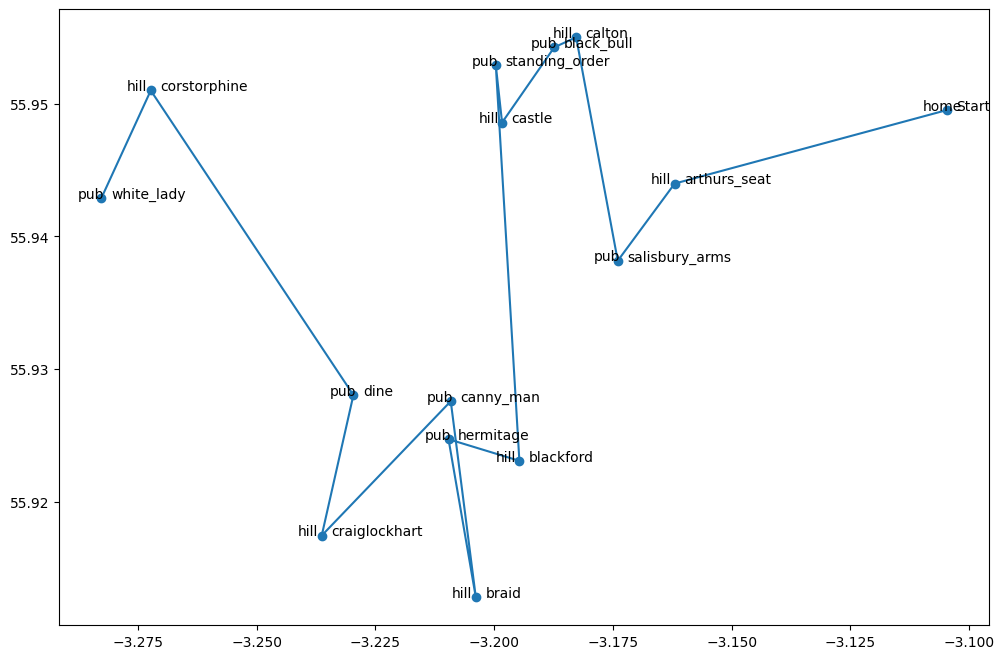

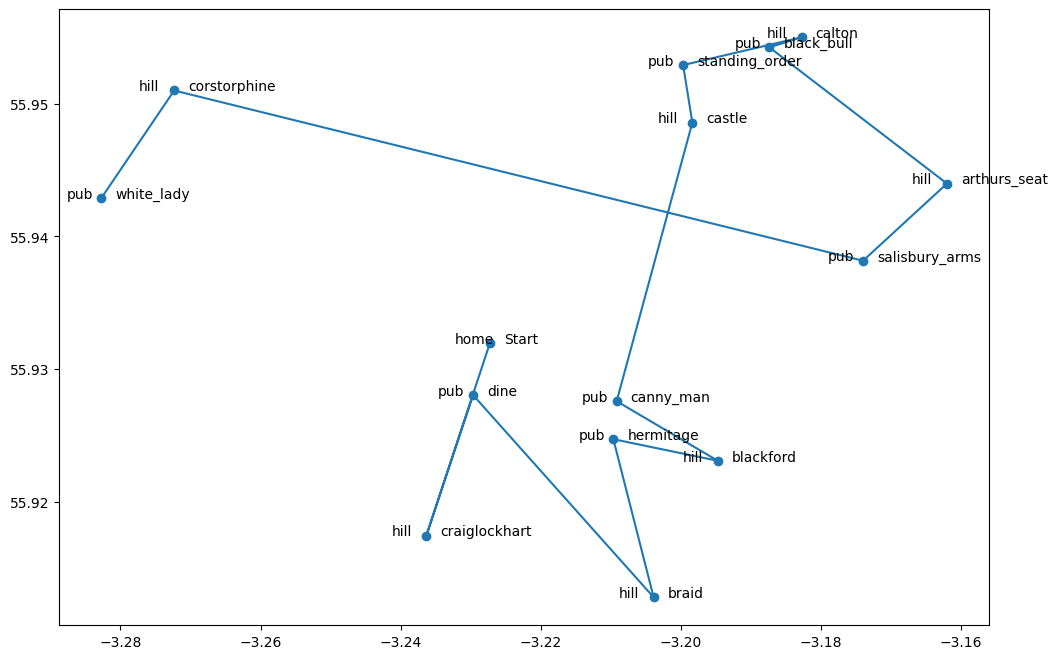

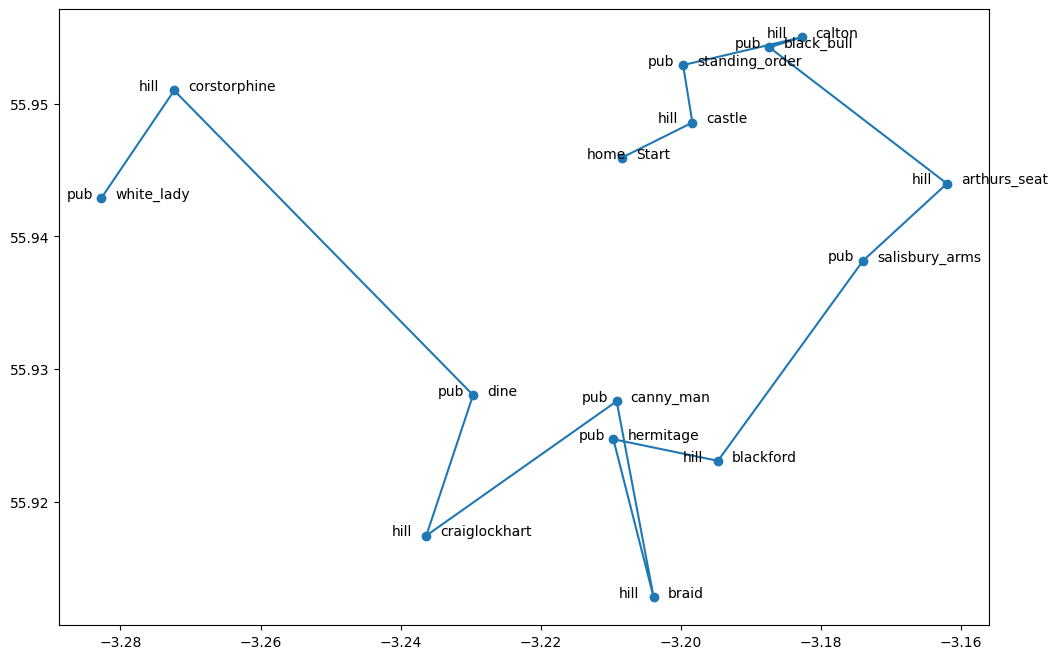

In [68]:
import matplotlib.pyplot as plt
dans = (55.94952949487424, -3.104646486646672)
mine = (55.93196325187285, -3.2272465675184727)
work = (55.9459286053038, -3.208434054449372)

start_point_1 = {'name': 'Start', 'x': dans[0], 'y': dans[1], 'type': 'home'}

visted_hilltops_1 = find_path(start_point_1)

start_point_2 = {'name': 'Start', 'x': mine[0], 'y': mine[1], 'type': 'home'}

visted_hilltops_2 = find_path(start_point_2)

start_point_3 = {'name': 'Start', 'x': work[0], 'y': work[1], 'type': 'home'}

visted_hilltops_3 = find_path(start_point_3)

def plot_points(visted_hilltops):
    x_coords = [point['x'] for point in visted_hilltops]
    y_coords = [point['y'] for point in visted_hilltops]
    plt.figure(figsize=(12,8))

    plt.plot(y_coords, x_coords, marker='o')
    
    for i, point in enumerate(visted_hilltops):
        plt.annotate(point['name'], (y_coords[i] + 0.002, x_coords[i]))
        plt.annotate(point['type'], (y_coords[i] - 0.005, x_coords[i]))

    plt.show()

plot_points(visted_hilltops_1)
plot_points(visted_hilltops_2)
plot_points(visted_hilltops_3)